와인의 종류 예측하기

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import numpy as np
import tensorflow as tf

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#데이터 입력
df_pre = pd.read_csv("/wine.csv", header=None)
df = df_pre.sample(frac=1)

#데이터 분류
dataset = df.values
X = dataset[:, 0:12].astype(float)    #상속
Y = dataset[:, 12].astype(float)    #클래스

#모델의 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#====================================모델 업데이트 하기===================================
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#모델 저장 폴더 선정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):    #만약 MODEL_FIR가 없다면
    os.mkdir(MODEL_DIR)              #만들어라

#모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

#모델 실행 및 저장
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])
#=========================================================================================

#결과 출력
print("\n Accuracy : %.2f%%" % (model.evaluate(X, Y)[1]*100))


Epoch 00001: val_loss improved from inf to 0.29722, saving model to ./model/01-0.2972.hdf5

Epoch 00002: val_loss improved from 0.29722 to 0.25425, saving model to ./model/02-0.2543.hdf5

Epoch 00003: val_loss improved from 0.25425 to 0.23356, saving model to ./model/03-0.2336.hdf5

Epoch 00004: val_loss improved from 0.23356 to 0.21444, saving model to ./model/04-0.2144.hdf5

Epoch 00005: val_loss improved from 0.21444 to 0.19984, saving model to ./model/05-0.1998.hdf5

Epoch 00006: val_loss improved from 0.19984 to 0.19539, saving model to ./model/06-0.1954.hdf5

Epoch 00007: val_loss improved from 0.19539 to 0.19016, saving model to ./model/07-0.1902.hdf5

Epoch 00008: val_loss did not improve from 0.19016

Epoch 00009: val_loss improved from 0.19016 to 0.18586, saving model to ./model/09-0.1859.hdf5

Epoch 00010: val_loss improved from 0.18586 to 0.18406, saving model to ./model/10-0.1841.hdf5

Epoch 00011: val_loss did not improve from 0.18406

Epoch 00012: val_loss improved from

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
9/9 [==============================] - 0s 6ms/step - loss: 0.0377 - accuracy: 0.9913 - val_loss: 0.0451 - val_accuracy: 0.9893
Epoch 1002/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0402 - accuracy: 0.9892 - val_loss: 0.0502 - val_accuracy: 0.9883
Epoch 1003/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0375 - accuracy: 0.9906 - val_loss: 0.0456 - val_accuracy: 0.9883
Epoch 1004/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.9903 - val_loss: 0.0457 - val_accuracy: 0.9888
Epoch 1005/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0385 - accuracy: 0.9892 - val_loss: 0.0454 - val_accuracy: 0.9888
Epoch 1006/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0367 - accuracy: 0.9915 - val_loss: 0.0473 - val_accuracy: 0.9888
Epoch 1007/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0373 - accuracy: 0.9917 - val_loss: 0.0469 - 

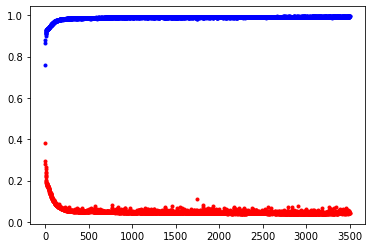

In [3]:
#그래프로 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#데이터 입력
df_pre = pd.read_csv("/wine.csv", header=None)
df = df_pre.sample(frac=1)

#데이터 분류
dataset = df.values
X = dataset[:, 0:12].astype(float)    #상속
Y = dataset[:, 12].astype(float)    #클래스

#모델의 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#====================================그래프로 확인하기===================================
#모델 실행 및 저장
#validation_split을 위해 훈련 데이터의 일부를 자동으로 예약 할 데이터의 비율을
#나타내므로 0보다 크고 1보다 작은 숫자로 설정해야 함
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

#y_vloss에 테스스텟으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

#y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']

#x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()
#=========================================================================================



Epoch 00001: val_loss improved from inf to 0.33148, saving model to ./model/01-0.3315.hdf5

Epoch 00002: val_loss improved from 0.33148 to 0.29520, saving model to ./model/02-0.2952.hdf5

Epoch 00003: val_loss improved from 0.29520 to 0.27461, saving model to ./model/03-0.2746.hdf5

Epoch 00004: val_loss improved from 0.27461 to 0.25951, saving model to ./model/04-0.2595.hdf5

Epoch 00005: val_loss improved from 0.25951 to 0.24578, saving model to ./model/05-0.2458.hdf5

Epoch 00006: val_loss improved from 0.24578 to 0.23144, saving model to ./model/06-0.2314.hdf5

Epoch 00007: val_loss improved from 0.23144 to 0.22620, saving model to ./model/07-0.2262.hdf5

Epoch 00008: val_loss improved from 0.22620 to 0.22013, saving model to ./model/08-0.2201.hdf5

Epoch 00009: val_loss did not improve from 0.22013

Epoch 00010: val_loss improved from 0.22013 to 0.21945, saving model to ./model/10-0.2194.hdf5

Epoch 00011: val_loss improved from 0.21945 to 0.21147, saving model to ./model/11-0.21

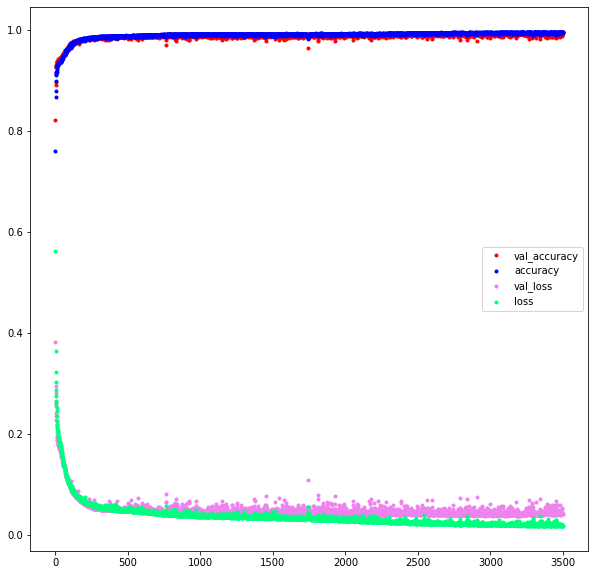

143/143 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9921

 Train Accuracy : 99.21%
61/61 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.9887

 Test Accuracy : 98.87%


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#데이터 입력
df_pre = pd.read_csv("/wine.csv", header=None)
df = df_pre.sample(frac=1)

#데이터 분류
dataset = df.values
X = dataset[:, 0:12]    #상속
Y = dataset[:, 12]    #클래스

#모델의 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#===================모범답안에서 추가한 코드===============
from sklearn.model_selection import train_test_split
#학습셋과 테스트셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):    #만약 MODEL_FIR가 없다면
    os.mkdir(MODEL_DIR)  
    
#모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

#모델 실행 및 저장
model.fit(X_train, Y_train, validation_split=0.2, epochs=1500, batch_size=200, verbose=0, callbacks=[checkpointer])

#y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vacc = history.history['val_accuracy']
y_vloss = history.history['val_loss']

#y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']
y_loss = history.history['loss']

#x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시

#x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(10,10))
plt.plot(x_len, y_vacc, "o", c="red", markersize=3, label='val_accuracy')
plt.plot(x_len, y_acc, "o", c="blue", markersize=3, label='accuracy')
plt.plot(x_len, y_vloss, "o", c="violet", markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "o", c="springgreen", markersize=3, label='loss')

plt.legend()
plt.show()

#결과 출력
print("\n Train Accuracy : %.2f%%" % (model.evaluate(X_train, Y_train)[1]*100))
print("\n Test Accuracy : %.2f%%" % (model.evaluate(X_test,Y_test)[1]*100))
#==========================================================

In [7]:
#학습의 자동 중단
#다른 셀에서 실행해볼것
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#데이터 입력
df_pre = pd.read_csv("/wine.csv", header=None)
df = df_pre.sample(frac=0.15)

#데이터 분류
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

#모델의 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

#모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

#모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500, callbacks=[early_stopping_callback,checkpointer])

#결과 출력
print("\n Accuracy : %.2f%%" % (model.evaluate(X, Y)[1]*100))

Epoch 1/3500
2/2 [==============================] - 1s 137ms/step - loss: 0.7844 - accuracy: 0.7596 - val_loss: 0.5725 - val_accuracy: 0.7795

Epoch 00001: val_loss improved from inf to 0.57246, saving model to ./model/01-0.5725.hdf5
Epoch 2/3500
2/2 [==============================] - 0s 20ms/step - loss: 0.5981 - accuracy: 0.7642 - val_loss: 0.4143 - val_accuracy: 0.7826

Epoch 00002: val_loss improved from 0.57246 to 0.41434, saving model to ./model/02-0.4143.hdf5
Epoch 3/3500
2/2 [==============================] - 0s 19ms/step - loss: 0.4410 - accuracy: 0.7718 - val_loss: 0.3250 - val_accuracy: 0.7950

Epoch 00003: val_loss improved from 0.41434 to 0.32497, saving model to ./model/03-0.3250.hdf5
Epoch 4/3500
2/2 [==============================] - 0s 21ms/step - loss: 0.3739 - accuracy: 0.7734 - val_loss: 0.3308 - val_accuracy: 0.8416

Epoch 00004: val_loss did not improve from 0.32497
Epoch 5/3500
2/2 [==============================] - 0s 21ms/step - loss: 0.3827 - accuracy: 0.8101 